In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [465]:
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import joblib

In [440]:
df_test1 = pd.read_csv('test1.csv')
df_test2 = pd.read_csv('test2.csv')
df1 = pd.read_csv('train.csv')

In [441]:
df1.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,21.7600,31.133333,437.333333,1029.666667,0.005021,1
1,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2,21.7675,31.122500,434.000000,1003.750000,0.005022,1
3,21.7675,31.122500,439.000000,1009.500000,0.005022,1
4,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [442]:
df1.shape

(9752, 6)

In [443]:
df1['Occupancy'].value_counts()

0    7703
1    2049
Name: Occupancy, dtype: int64

### Since Occupancy has 7703 0s and 2049 1s 
### we can reduce 0 values to <2100

In [444]:
filt = (df1['Occupancy'] ==0)
occu0 =df1.loc[filt]

In [445]:
occu0.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
36,21.89,31.550000,436.50,1047.0,0.005130,0
37,21.89,31.360000,434.00,1031.0,0.005099,0
38,21.89,31.125000,432.75,977.5,0.005060,0
217,21.70,28.566667,0.00,582.0,0.004587,0
218,21.70,28.760000,0.00,578.0,0.004618,0


In [446]:
occu0.shape

(7703, 6)

In [447]:
df0 = occu0.loc[195:3100]
df0.shape

(2146, 6)

In [448]:
df1 = df1.loc[df1['Occupancy']==1]

In [449]:
df1.shape

(2049, 6)

### Now we have 2146 0s and 2049 1s
### We can procede with this dataset

## concatinating 2 datasets(1,0)

In [450]:
df = pd.concat([df0,df1],axis=0)

In [451]:
df.shape

(4195, 6)

In [452]:
df.index = [i for i in range(4195)]

In [453]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,21.7,28.566667,0.0,582.0,0.004587,0
1,21.7,28.760000,0.0,578.0,0.004618,0
2,21.7,28.790000,0.0,584.0,0.004623,0
3,21.7,28.790000,0.0,586.5,0.004623,0
4,21.7,28.840000,0.0,587.5,0.004631,0


In [454]:
df.tail()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
4190,20.815,27.7175,429.75,1505.25,0.004213,1
4191,20.865,27.7450,423.50,1514.50,0.004230,1
4192,20.890,27.7450,423.50,1521.50,0.004237,1
4193,20.890,28.0225,418.75,1632.00,0.004279,1
4194,21.000,28.1000,409.00,1864.00,0.004321,1


In [455]:
x_data = df[df.columns[0:5]]
y_data = df[df.columns[5]]

In [456]:
x_data.head()

,Temperature,Humidity,Light,CO2,HumidityRatio
0,21.7,28.566667,0.0,582.0,0.004587
1,21.7,28.760000,0.0,578.0,0.004618
2,21.7,28.790000,0.0,584.0,0.004623
3,21.7,28.790000,0.0,586.5,0.004623
4,21.7,28.840000,0.0,587.5,0.004631


### checking for possible null/NaN values

In [457]:
y_data.tail()

4190    1
4191    1
4192    1
4193    1
4194    1
Name: Occupancy, dtype: int64

In [458]:
x_data.isna().sum()

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
dtype: int64

In [459]:
y_data.isna().sum()

0

### checking correlation for x data

[]

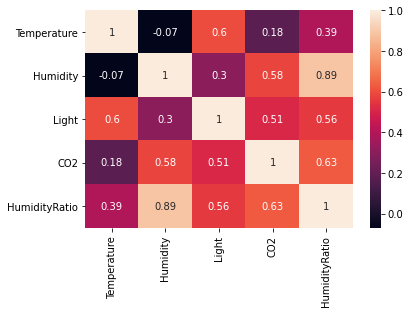

In [460]:
sns.heatmap(x_data.corr(),annot=True)
plt.plot()

In [470]:
#sns.pairplot(x_data)
#plt.plot()

## Detecting outliers in each column

## Outlier detection using Z-score

In [475]:
def zscore(data):
    all_values = []
    outliers = []
    th = 3
    mean = np.mean(data)
    std = np.std(data)
    for val in data:
        z_score = (val -mean)/std
        all_values.append(z_score)
        if np.abs(z_score)>th:
            outliers.append(z_score)
    plt.hist(all_values)
    plt.xlabel(col)
    plt.show()
    return np.array(outliers)

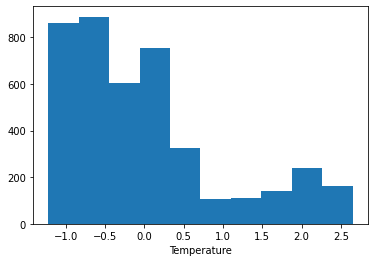

Temperature outliers: []


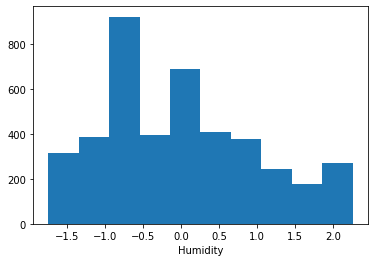

Humidity outliers: []


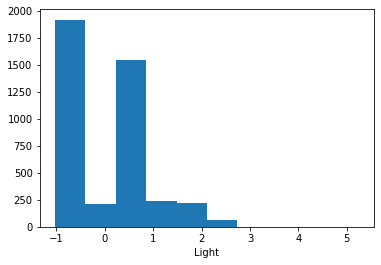

Light outliers: [4.45622443 5.25542204 3.02979585]


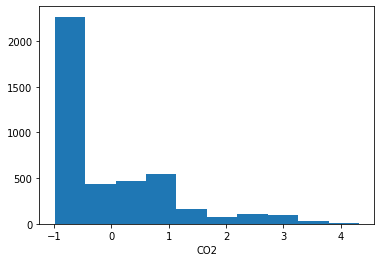

CO2 outliers: [3.91685259 3.55165875 3.0250108  3.03654323 3.03269909 3.0173225
 3.02693287 3.06153018 3.00194592 3.00771214 3.01924458 3.04999774
 3.25854264 3.27872441 3.24540848 3.49015242 3.505529   3.64968447
 3.8386883  3.90820326 3.98989136 3.98604721 3.9725927  3.97835892
 4.23495564 4.10617676 3.87841113 3.83996968 3.70638562 3.61700923
 3.56895741 3.62213476 3.68524281 3.67082727 3.61989234 3.62469752
 3.68492247 3.67851556 3.66698312 3.59138159 3.5273125  3.47669791
 3.50168486 3.45939926 3.44594475 3.41070674 3.37675012 3.30371136
 3.30947757 3.31332172 3.32773727 3.00002385 3.42480195 4.31664374]


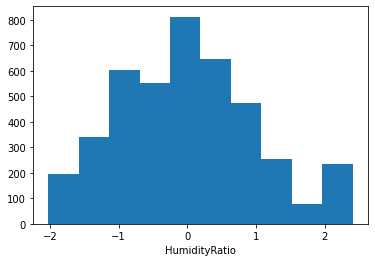

HumidityRatio outliers: []


In [476]:
for col in x_data.columns:
    print(col,'outliers:',zscore(x_data[col]))

## Outlier detection using inter-quantiles

In [342]:
def inter_quantiles(data):
    q1,q3 = np.percentile(data,[25,75])
    iqr = q3 - q1
    lb = q1 - (1.5*iqr)
    ub = q3 - (1.5*iqr)
    return lb,ub

In [343]:
for col in x_data.columns:
    lb,ub = inter_quantiles(x_data[col])
    #print(col,'outliers:',lb,ub)
    filt = (x_data[col]<lb) & (x_data[col]>ub)
    print(x_data.loc[filt])

Empty DataFrame
Columns: [Temperature, Humidity, Light, CO2, HumidityRatio]
Index: []
Empty DataFrame
Columns: [Temperature, Humidity, Light, CO2, HumidityRatio]
Index: []
Empty DataFrame
Columns: [Temperature, Humidity, Light, CO2, HumidityRatio]
Index: []
Empty DataFrame
Columns: [Temperature, Humidity, Light, CO2, HumidityRatio]
Index: []
Empty DataFrame
Columns: [Temperature, Humidity, Light, CO2, HumidityRatio]
Index: []


## we have outliers in CO2 column

In [369]:
values = (zscore(x_data['CO2']))

In [370]:
x_data['CO2'].replace(values, [np.mean(x_data['CO2']) for i in range(len(values))],inplace=True)

In [371]:
zscore(x_data['CO2'])
## No outliers now

array([], dtype=float64)

In [372]:
y_data.value_counts()

0    2146
1    2049
Name: Occupancy, dtype: int64

In [373]:
x_data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio
count,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000
mean,21.688232,27.483891,259.249519,693.639984,0.004414
std,1.019780,3.212412,251.532234,177.539307,0.000563
min,20.445000,21.865000,0.000000,484.666667,0.003275
25%,20.890000,25.050000,0.000000,565.000000,0.003956
50%,21.500000,27.166667,291.750000,604.666667,0.004425
75%,22.100000,29.666667,447.000000,814.125000,0.004765
max,24.390000,34.733333,1581.000000,1226.000000,0.005769


In [374]:
from sklearn.svm import SVC

In [375]:
model = SVC(kernel='linear')
model.fit(x_data,y_data)

SVC(kernel='linear')

In [376]:
pred = model.predict(x_test)
pred

array([0, 0, 1, ..., 0, 0, 1])

In [377]:
xt = df_test1[df_test1.columns[0:5]]
yt = df_test1[df_test1.columns[5]]

In [378]:
model.score(xt,yt)

0.9789868667917448

In [379]:
xt2 = df_test2[df_test2.columns[0:5]]
yt2 = df_test2[df_test2.columns[5]]

In [380]:
xt.shape

(2665, 5)

In [381]:
model.score(xt2,yt2)

0.9776495149207909

In [218]:
xt2.shape

(9752, 5)

In [382]:
rModel = RandomizedSearchCV(
    SVC(),
    param_distributions = {
        'C':[1,4,10],
        'kernel':['rbf','linear']
    },
    n_iter=4,
    cv=5,
    )

In [383]:
rModel.fit(x_data,y_data)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=4,
                   param_distributions={'C': [1, 4, 10],
                                        'kernel': ['rbf', 'linear']})

In [384]:
pd.DataFrame(rModel.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,45.102174,24.106435,0.008189,0.000352,linear,10,"{'kernel': 'linear', 'C': 10}",0.977354,0.985697,0.995232,1.000000,0.978546,0.987366,0.008970,2
1,0.054153,0.009566,0.010906,0.000798,rbf,10,"{'kernel': 'rbf', 'C': 10}",0.994041,0.733015,0.994041,0.998808,0.974970,0.938975,0.103305,4
2,26.958643,12.277888,0.008250,0.000391,linear,4,"{'kernel': 'linear', 'C': 4}",0.969011,0.992849,0.995232,1.000000,0.977354,0.986889,0.011727,3
3,20.458985,9.985217,0.008234,0.000343,linear,1,"{'kernel': 'linear', 'C': 1}",0.980930,0.992849,0.995232,1.000000,0.977354,0.989273,0.008661,1


In [385]:
model = SVC(kernel='linear',C=1,gamma='scale')
model.fit(x_data,y_data)

SVC(C=1, kernel='linear')

In [386]:
model.score(xt,yt)

0.9789868667917448

In [387]:
model.score(xt2,yt2)

0.9776495149207909

In [388]:
model.score(x_data,y_data)

0.9918951132300358

In [389]:
model.score(x_data,y_data)

0.9918951132300358

In [403]:
xt0 = df[df.columns[0:5]][df['Occupancy']==0]

In [407]:
yt0 = df['Occupancy'][df['Occupancy'] == 0]

In [410]:
model.score(xt0,yt0)

0.9883504193849021

In [411]:
xt1 = df[df.columns[0:5]][df['Occupancy']==0]
yt1 = df['Occupancy'][df['Occupancy'] == 0]

In [412]:
model.score(xt1,yt1)

0.9883504193849021

In [414]:
df =df_test1.copy()
xt0 = df[df.columns[0:5]][df['Occupancy']==0]
yt0 = df['Occupancy'][df['Occupancy'] == 0]
model.score(xt0,yt0)

0.9681039574719433

In [415]:
df =df_test1.copy()
xt1 = df[df.columns[0:5]][df['Occupancy']==1]
yt1 = df['Occupancy'][df['Occupancy'] == 1]
model.score(xt1,yt1)

0.9979423868312757

In [416]:
df =df_test2.copy()
xt1 = df[df.columns[0:5]][df['Occupancy']==1]
yt1 = df['Occupancy'][df['Occupancy'] == 1]
model.score(xt1,yt1)

0.9982648930017352

In [417]:
df =df_test2.copy()
xt0 = df[df.columns[0:5]][df['Occupancy']==0]
yt0 = df['Occupancy'][df['Occupancy'] == 0]
model.score(xt0,yt0)

0.9720922980979109

In [466]:
file = joblib.dump(model,'occupancy_model')

In [467]:
model_ = joblib.load('occupancy_model')

In [469]:
#21.7600 	31.133333 	437.333333 	1029.666667 	0.005021
model_.predict([[21,32,437,1029,0.005]])

array([1])